# **Kafka Streams Topology**

카프카 스트림즈는 카프카에 저장된 데이터를 실시간 처리하기 위한 클라이언트 라이브러리이다. 주된 용도는 특정 토픽에 들어오는 데이터를 처리하여 카프카의 다른 토픽 또는 외부 스토리지에 실시간으로 입력하는 것이다.

Kafka를 단순한 메시징 큐가 아닌 데이터 처리 프로세서로 사용하고자 할 때, Spark Streaming이나 Storm의 대안이 될 수 있다. 단, 서로 다른 카프카 클러스터 간에는 Kafka Streams 애플리케이션이 동작할 수 없다.



**Stateful vs Stateless**

**상태 기반 처리 (stateful stream processing)**
* 스트림 처리를 할 때, 이전 스트림의 처리 결과를 참조해야 하는 경우를 상태 기반 처리라 한다.
* 애플리케이션에서 각각의 이벤트를 처리하고 그 결과를 저장할 상태 저장소(state store)가 필요하다.
* 대표적인 예로, 실시간 추천 시스템 등이 있다.

**무상태 스트림 처리 (stateless stream processing)**

* 이전 스트림의 처리 결과와 관계 없이 현재 애플리케이션에 도달한 스트림만을 기준으로 처리한다.

**Kafka Streams Topology**

* 카프카 스트림즈는 카프카에 저장된 데이터를 처리하고 분석하기 위한 클라이언트 라이브러리이다.
* Spark Streaming이나 Storm과 같이 스트림 처리를 하는 프로세서들이 서로 연결되어 Topology를 만들어서 처리하는 API이다.

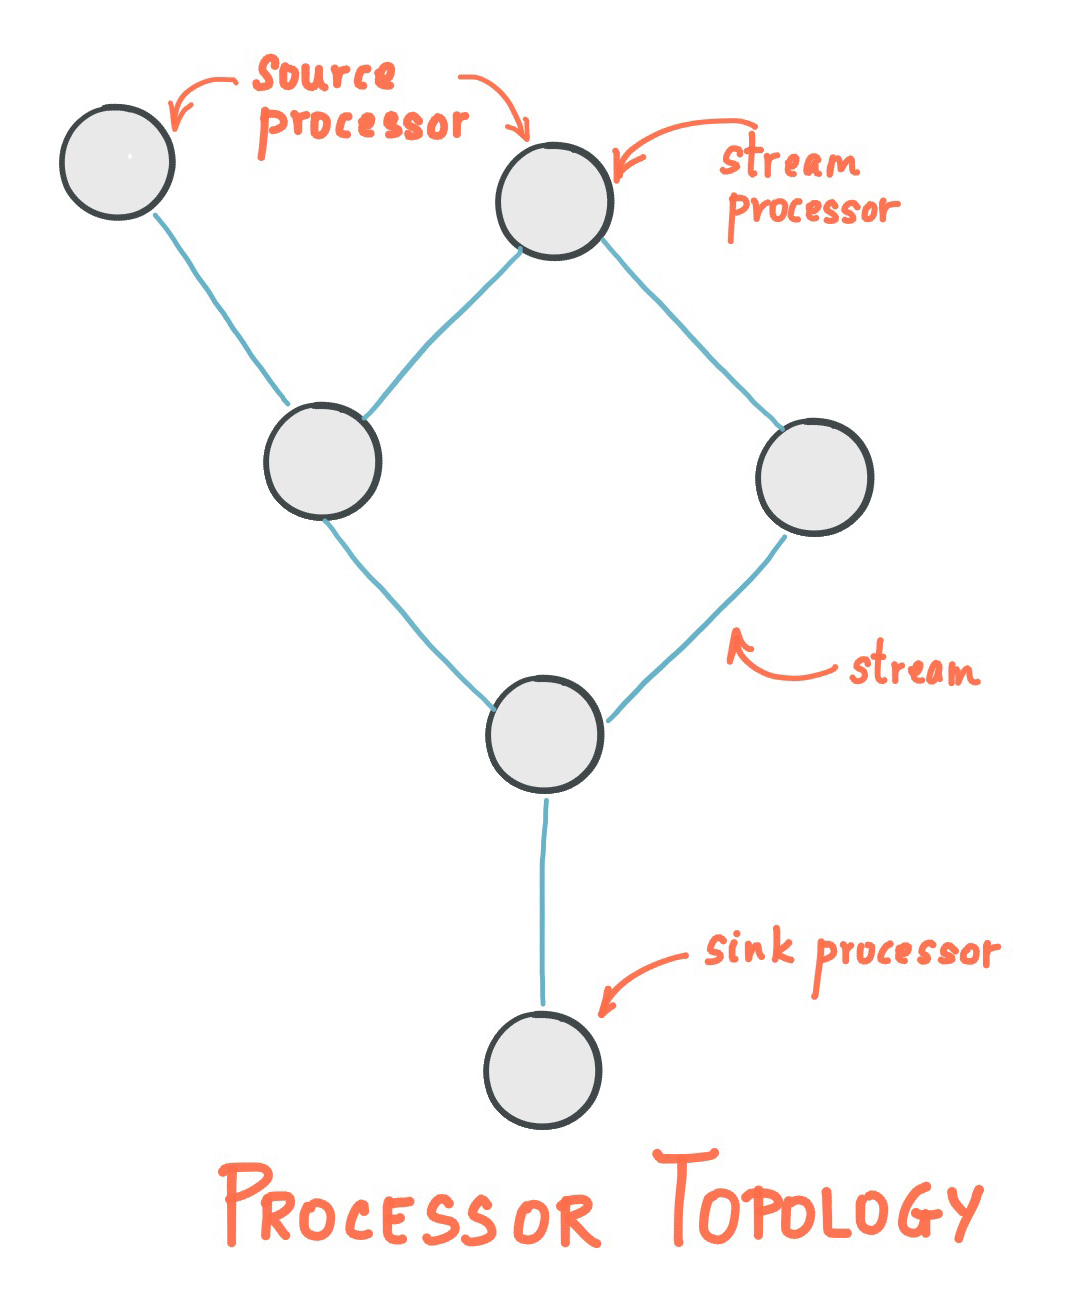

* 이벤트 시간과 처리 시간을 분리하여 다룬다.
시스템이나 카프카에 대한 의존성 없이 개발할 수 있다.
* 이중화된 로컬 저장소를 지원한다.
* Broker나 클라이언트에 장애가 생기더라도 스트림에 대해 1번만 처리가 되는 것을 보장한다.
* 고수준의 스트림 DSL(Domain Specific Language)을 지원하며, 저수준의 프로세싱 API도 제공한다.

**Kafka Streams Topology 용어**

* 스트림(Stream) : Kafka Streams API로 생성된 토폴로지로, 끊임없이 전달되는 데이터 세트(key-value)를 의미한다.
* 스트림 처리 애플리케이션(Stream processing application) : Kafka Streams 클라이언트 애플리케이션
* 스트림 프로세서(Stream Processor) : 프로세서 토폴로지를 구성하는 하나의 노드를 말하며, 각 노드는 입력받은 데이터를 변환하여 다시 연결된 프로세서에 보내는 역할을 수행한다.
* 소스 프로세서(Source Processor) : 위로 연결된 프로세서가 없는 프로세서. 카프카 토픽에서 데이터 레코드를 읽고 아래의 프로세서에 전달한다.
* 싱크 프로세서(Sink Processor) : 아래로 연결된 프로세서가 없는 프로세서. 상위 프로세서로부터 받은 데이터 레코드를 카프카의 특정 토픽에 저장한다.

**Kafka Streams 아키텍처**

* 각 스트림 파티션은 토픽 파티션의 메시지이다.
* 스트림의 데이터 레코드는 토픽의 메시지(key-value)이다.
* 데이터 레코드의 key를 통해 다음 스트림(카프카 토픽)으로 전달된다.
* Kafka Streams는 입력 스트림의 파티션 개수만큰 태스크를 생성한다.
* 각 태스크에는 입력 스트림(카프카 토픽) 파티션들이 할당된다.
* 스레드 개수를 지정하여 효과적으로 병렬처리를 수행할 수 있으며 1개의 스레드는 1개 이상의 태스크를 처리한다.

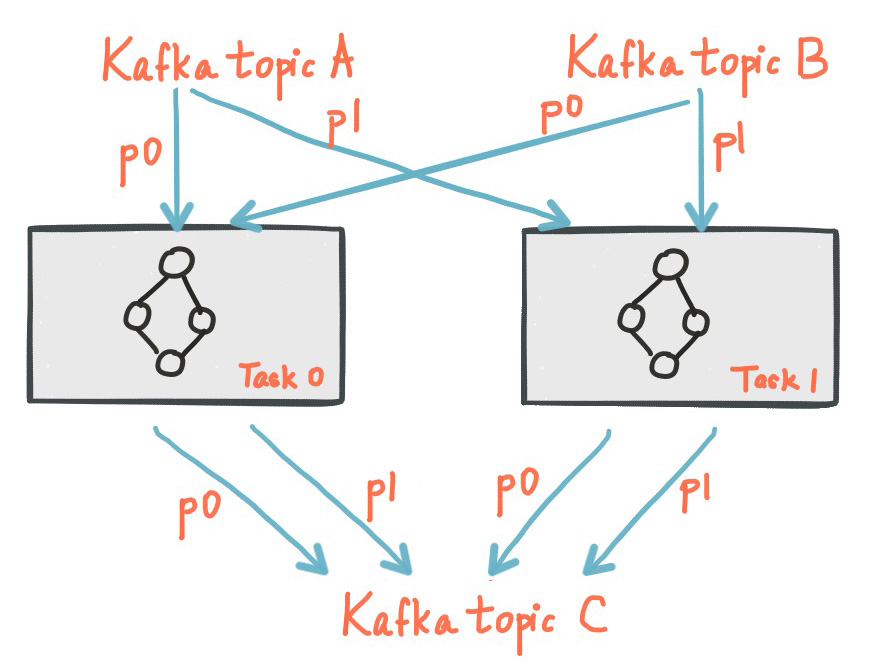

**Kafka Cluster간의 Streams?**

* 클러스터 A의 토픽에서 읽은 데이터를 클러스터 B의 토픽에 입력하는 것은 불가능하다.
* 서로 다른 클러스터의 두 토픽으로부터 데이터를 읽은 것은 불가능하다.

**Kafka Stream vs Spark Streaming**

* Kafka Stream은 microbatch 프로세싱이 아닌, millisecond latency의 event-at-a-time 프로세싱이다.
* Spark은 Kafka의 데이터를 실시간으로 처리하기 위한 좋은 선택이지만, 실시간 처리 하나만을 위해 Spark cluster를 구축하는 것은 비용이 크고 시스템을 복잡하게 만든다.
* Kafka Streams가 좋은 대안이 될 수 있다.
